# Week4: 모델 훈련

본 장에서는 경사하강법을 주로 하여 선형 모델과 로지스틱 회귀 모델을 훈련하고 예측을 수행하는 방법에 대해 알아보자.

모델을 훈련하는 방법에는 크게 두가지가 있다.

1. 수학적으로 증명된 공식을 통하여 훈련 데이터에 잘 맞는 파라미터 값을 해석적으로 구하는 방법

2. 경사하강법을 통해 비용함수를 최소화하는 파라미터 값을 구하는 방법


In [3]:
# 해당셀은 기본적인 라이브러리와 setup을 수행하는 코드로 구성되어 있습니다.
# Base setup

# Load system modules
import os
import sys


# Load modules for data handling
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Path setup
main_path = os.getcwd().split(
    'muchine_learninng_notebook')[0] + 'muchine_learninng_notebook/codes'
datasets_path = os.path.join(main_path, 'datasets')

sys.path.append(main_path)


# graph setup
# 깔금한 그래프 출력을 위해
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Set seed
np.random.seed(42)
random_seed = 42

## 선형 회귀


우선 선형 회귀를 수행하기 위해 대략 선형적인 분포를 가지는 X와 y 데이터를 생성해보자.


그림 저장: generated_data_plot


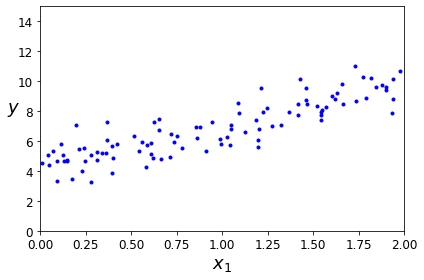

In [4]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### 수학 공식을 통한 해석적 도출


사이킷런에서는 특이값 분해를 사용하여 선형 회귀를 수행하는 `LinearRegression` 클래스를 제공한다.

LinearRegression은 특이값 분해를 사용하여 해석적으로 파라미터를 탐색함으로 모델 학습의 첫 번째 방법에 해당한다.


In [5]:
from sklearn.linear_model import LinearRegression

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.

lin_reg = LinearRegression()  # 모델 인스턴스 생성
lin_reg.fit(X, y)  # 모델 훈련
pred = lin_reg.predict(X_new)  # 모델 예측
print(f'y = {pred[0][0]:.2f}x + {pred[1][0]:.2f}')

y = 4.22x + 9.76


그래프에 표시하여 확인해보자.


그림 저장: generated_data_plot


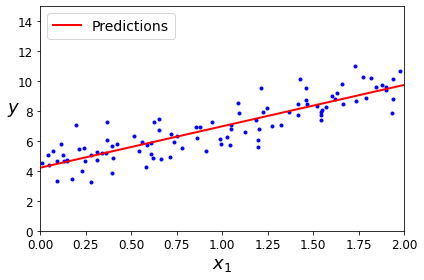

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.plot(X_new, pred, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
save_fig("generated_data_plot")
plt.show()

### 경사 하강법


경사하강법이란 비용함수를 최소화하기 위해 반복적으로 파라미터를 조정해가는 방법이다.

경사 하강법에서 중요한 요점은 아래와 같다.

1. 학습률(Learning rate): 스텝의 크기는 얼마로 정할 것인가

   - 학습률이 너무 작으면 학습 속도가 느려지며 최소지점에 도달하지 못하는 경우가 발생한다.

   - 학습률이 너무 크면 발산(Zig-Zag) 하는 경우가 발생하여 최소지점에 도달하지 못하는 경우가 발생한다.

   - 따라서 적절한 학습률을 설정하는 것이 중요하다.

2. 지역 최소값: 지역 최소값에 빠지지 않도록 하는 것이 중요하다.

   - 경사 하강법은 반복적으로 파라미터를 조정해가며 비용함수를 최소화하는 파라미터를 찾는다.

   - 하지만 비용함수가 복잡한 모양을 가지고 있을 경우 지역 최소값에 빠질 수 있다.

   - 따라서 비용함수가 복잡한 모양을 가지고 있을 경우 전역 최소값을 찾을 수 있는 경사 하강법을 사용해야 한다.

> 다행히도 본 장에서 다루는 선형 회귀 모델에서 비용함수(MSE)는 블록 함수(Convex function)으로 지역 최소값 없이 하나의 전역 최솟값만 존재함이 증명되어 있다. 따라서 2번 과정은 크게 고려하지 않아도 된다.


### 경사하강법 종류

경사 하강법 종류는 아래와 같다.

- **배치 경사 하강법**

  - 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산.

  - 훈련 세트가 커지면 매우 느려짐

- **확률적 경사 하강법**

  - 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산.

- **미니배치 경사 하강법**

  - 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산

하나씩 사용하며 알아보자.


#### 배치 경사 하강법

가장 기본적인 경사 하강법이다. 수식으로 아래와 같이 정의할 수 있다.

$$\theta_{i+1} = \theta_i - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})\,\,\,\,\,\, \eta = \text{learning rate}$$

조금 여려워 보이는데 예를 들어 보자.

함수의 최소 지점을 찾고자 하는데 나의 위치에서 기울기가 -3이라고 해보자. 그럼 최소 지점으로 가기 위해서는 양의 방향으로 이동해야 함을 알 수 있다.

이때 학습률(lr)이 0.01이라면 다음 위치는 현재 위치에서 0.03만큼 이동한 위치가 된다. 이를 반복하면서 최소 지점에 도달하게 된다는 것이 배치 경사 하강법의 기본 개념이다.

이와 같이 배치 경사 하강법은 전체 훈련 데이터를 사용하여 그레이디언트를 계산하는 방법이다. 따라서 시간이 오래걸리며 메모리 소모가 크다는 단점이 존재하지만 안정적으로 최소점으로 수렴한다는 장점이 있다.

코드를 통해 확인해보자.


In [7]:
lr = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 랜덤 초기화
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.

for iteration in range(n_iterations):

    # gradient 계산(자세한 내용은 Backpropagation에서 다룸)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

    # 경사하강법 수행
    theta = theta - lr * gradients

그림 저장: gradient_descent_plot


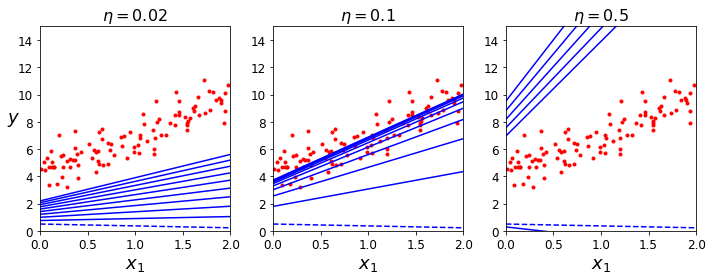

In [8]:
# 그래프를 통해 확인해보자.
theta_path_bgd = []


def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)

    # 데이터 분포(점) 그리기
    plt.plot(X, y, "r.")

    n_iterations = 1000
    for iteration in range(n_iterations):

        # 선 그리기
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "b--"
            plt.plot(X_new, y_predict, style)

        # gradient descent
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        # 후에 활용하기 위해 theta 저장(배치 경사 하강법 내용은 아님)
        if theta_path is not None:
            theta_path.append(theta)

    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

# eta가 0.02일 때의 경사 하강법
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta가 0.1일 때의 경사 하강법
plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta가 0.5일 때의 경사 하강법
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

#### 확률적 경사 하강법

##### 개요

배치 경사 하강법은 안정적으로 수렴하며 직관적이라는 장점이 있으나 전체 훈련 데이터를 사용하여 그레이디언트를 계산하기 때문에 매 스텝에서 많은 시간이 소요된다는 단점이 있다.

이에 메모리를 적게 소모하며 빠른 학습을 위해 확률적 경사 하강법이 제안되었다.

##### 확률적 경사 하강법이란

매 반복(스텝)에서 한 개의 샘플을 랜덤하게 선택하고 해당 샘플에 대해서 경사하강법을 수행한다.

이를 통해 적은 데이터로 학습할 수 있으며 한 개의 샘플만을 계산하기에 빠르게 학습을 수행할 수 있다는 장점이 있다.

하지만 확률적임으로 배치 경사 하강법보다 매우 불안정하다. 불규칙적인 비용 함수일 경우 지역 최소값에 빠지지 않고 전역 최소값을 찾을 확률이 배치 경사 하강법 보다는 크지만 이와 같은 무작위성은 전역 안정적으로 수렴하지 못할 가능성이 있다.

이에 시작시에는 학습률을 크게 하고, 점차 작게 줄여서 전역 최소값에 도달하도록 도와주는 학습 스케줄(learning schedule)을 통해 이러한 문제를 보완할 수 있다.

코드를 통해 확인해보자.


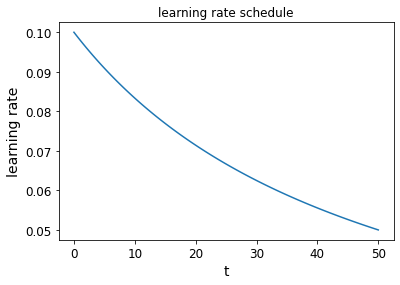

In [9]:
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터


def learning_schedule(t):
    return t0 / (t + t1)

# show learning schdule function


def show_learning_schedule():
    x = np.linspace(0, 50, 100)
    y = learning_schedule(x)
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("learning rate")
    plt.title("learning rate schedule")
    plt.show()


show_learning_schedule()

위와 같이 learning schedule 함수는 t값이 증가함에 따라 점차적으로 학습률을 줄여나가는 함수임을 확인할 수 있다.

확률적 경사 하강법을 확인해보자.


그림 저장: sgd_plot


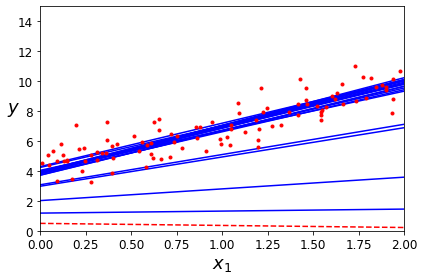

4.210760113791362 2.7485607937881738


In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50

theta = np.random.randn(2, 1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):

        # 예측 선 그리기
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 랜덤하게 샘플링
        random_index = np.random.randint(m)

        # 랜덤하게 샘플링된 샘플을 이용해 gradient 계산
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        # 학습 스케줄에 따른 학습률 계산
        eta = learning_schedule(epoch * m + i)

        # theta값 업데이트
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "r.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

print(theta[0][0], theta[1][0])

sklearn에서는 확률적 경사 하강법 클래스인 SGDRegressor를 제공한다. 위에서 직접 구현한 확률적 경사 하강법 함수와 sklearn의 SGDRegressor을 통해 구한 값을 비교해보자.


In [11]:
from sklearn.linear_model import SGDRegressor

# 확률적 경사 하강법 클래스 인스턴스 생성
sgd_reg = SGDRegressor(max_iter=1000,   # 최대 반복 횟수
                       tol=1e-3,        # 반복 중 허용 오차
                       penalty=None,    # 규제 없음
                       eta0=0.1,        # 학습률
                       random_state=42)  # 시드값

# 모델 학습(값 찾기)
sgd_reg.fit(X, y.ravel())

print(f'{sgd_reg.intercept_[0]:.2f}, {sgd_reg.coef_[0]:.2f}')  # 4.24, 2.83

4.24, 2.83


#### 미니배치 경사 하강법

BGD와 SGD의 절충안으로 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산하는 것이다.

미니배치 경사 하강법은 아래 특징을 지닌다.

1. 행렬 연산에 최적화된 GPU 특성 덕분에 빠르게 계산이 가능하다.

2. 파라미터가 더 많아져서 SGD보다는 덜 불규칙하게 움직인다.

3. 전반적으로 SGD보다 전역 최소값에 더 가까이 도달하나 지역 최소값에 빠지면 나오기 더 어렵다.

예를 들어 전체 데이터의 개수가 N이고 Epochs 만큼 반복하며 미니배치 크기가 m이라고 할 때

$$Epochs \times \cfrac{N}{m}$$

만큼 연산을 수행한다. N이 100, Epochs가 1000, 미니배치 크기가 50이라면 총 연산 회수는 2000이다.

코드를 통해 확인해보자.


In [10]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)


t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta[0][0], theta[1][0])

4.252146351170468 2.789640799661696


#### 3가지 경사 하강법 비교

3가지 경사 하강법을 하나의 그래프를 통해 확인해보자.


그림 저장: gradient_descent_paths_plot


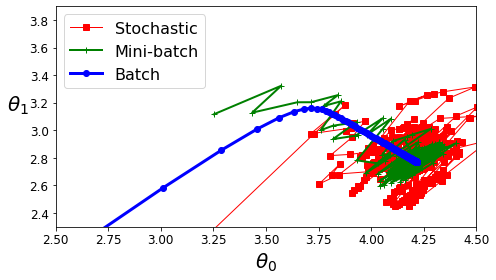

In [11]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],
         "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1],
         "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1],
         "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## 다항 회귀


선형 회귀 모델을 이용하여 비선형적인 회귀를 수행하기 위한 가장 직관적이면서도 간단한 방법은 제곱을 적용하는 것이다. 이를 다항 회귀라고 부른다.

y = ax + b 와 같은 함수의 차수를 올려 y = ax^2 + bx + c와 같이 구성한다면 비선형적인 함수의 형상이 됨을 확인 할 수 있다.

이와 같이 차수가 높은 다항식을 사용한 선형 회귀를 통해 더 복잡한 비선형적인 데이터를 학습할 수 있다.

코드로 보자.


우선 비선형적인 데이터를 생성해보자.


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

# 선형회귀를 수행
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_  # 절편: theta0
lin_reg.coef_  # 가중치: theta1, theta2

(array([2.31152435]), array([[0.90157616, 0.46987999]]))

그림 저장: quadratic_data_plot


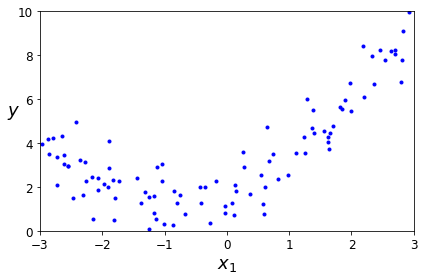

In [12]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

sklearn의 PolynomialFeatures를 통해 다항 회귀 연산을 수행할 수 있다.


그림 저장: quadratic_predictions_plot


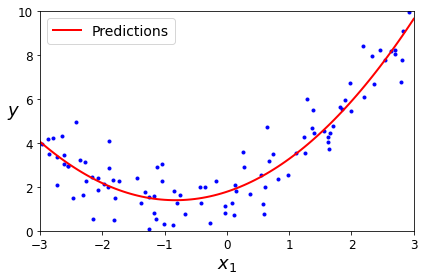

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# PolynomialFeatures 인스턴스 생성
# degree는 차수를 의미한다. 예를 들어 degree=2이면 2차항까지 고려하여 식을 y = ax^2 + bx + c로 표현한다.
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# X에 대해 degree=2인 다항식으로 변환
# X_poly란 X의 2차항까지 고려한 다항식을 의미한다.
X_poly = poly_features.fit_transform(X)

# 선형회귀를 수행
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# 그래프로 보여준다.
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## 학습 곡선


그림 저장: combined_learning_curves_plot


/var/folders/10/9_p98m6j42n84y4wmf_k0krc0000gn/T/ipykernel_74940/3903271666.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


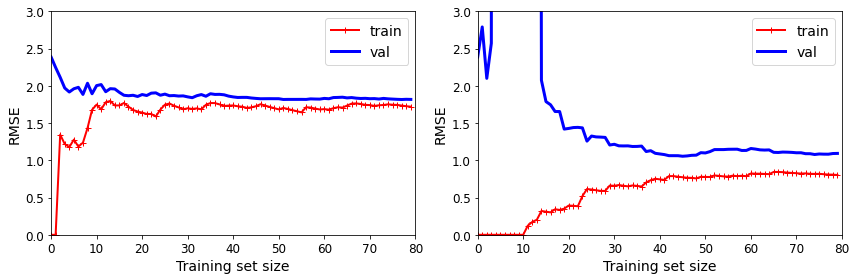

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y, subplot_position):
    # train set과 validation set으로 나눈다.
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=10)

    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):

        # 모델 학습
        model.fit(X_train[:m], y_train[:m])

        # 예측 수행
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # 그래프 그리기
    plt.subplot(1, 2, subplot_position)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])


# 선형회귀 모델 학습
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

lin_reg = LinearRegression()

plt.figure(figsize=(12, 4))
plot_learning_curves(lin_reg, X, y, 1)
plot_learning_curves(polynomial_regression, X, y, 2)
save_fig("combined_learning_curves_plot")
plt.tight_layout()
plt.show()

## 규제가 있는 선형 모델


In [15]:
# 규제가 있는 선형 모델 시험을 위한 데이터 생성

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

선형 모델 학습을 수행할 때 n개의 변수가 모두 결과 도출에 영향을 준다고 보장할 수 없다.

이러한 상황에 모델의 적합도를 높이기 위하여 변수의 개수를 증가시키는 것은 과적합을 유발 할 수 있기 때문에 주의해야 한다.

이에 변수의 개수를 제한하는 규제(regularization)가 필요하다.


### 최상위 부분 집합

최초로 규제를 도입한 모델은 최상위 부분 집합이다. 사실 규제라고 부르기도 모호할 정도로 전통적으로 사용되었던 방법이다.

잔차제곱합이 가장 작은 최소제곱회귀를 찾는 가장 확실한 방법은 전수조사 즉, p개 설명변수의 모든 가능한 조합을 확인하는 것이다. 이를 최상위 부분 집합이라고 한다.

최상의 부분집합 선택 알고리즘은 아래 순서로 진행된다.

설명변수를 포함하지 않는 영모델 을 적합한다. 즉 관측치의 표본평균을 통해 예측한다.
일 때, k개의 설명변수를 가지는 모든 모델 중에서 가장 작은 RSS 혹은 가장 큰 를 갖는 모델을 찾는다. 이 모델을 로 정의한다.
AIC, BIC, 조정된 , 등을 통해 중에서 최고의 모델을 선택한다.

최상위 부분집합 알고리즘은 모든 가능한 부분집합을 확인하는 것이기에 확정적으로 최상의 부분집합을 선택할 수 있다.

하지만 모든 가능한 부분집합을 확인하기 위해 개의 모델적합을 수행해야 한다는 계산상의 한계가 있다.

> 최상위 부분 집합은 적합한 변수를 선택하는 것임으로 '변수 선택' 이라고 부르기도 한다.


### 수축

최상위 부분 집합 선택 알고리즘은 결과에 영향을 많이 주는 n개의 변수를 선택하는 것이다. 하지만 변수를 선택하기에 정보의 손실이 발생할 수 있다.

이에 변수를 선택하지 않고 변수의 영향력을 낮추는 방향성으로 규제를 적용하는 방법이 수축이다.

#### 수축이란

수축(Regularization)은 p개의 설명변수를 모두 포함하되 불필요한 추정계수를 0 또는 0에 근접하게 함으로써 가장 검정오차가 작게 나오는 모델을 찾는 방법이다.

최상위 부분 집합 선택 알고리즘과 달리 수축은 변수의 계수값을 0 또는 0에 근접하게 수축함을써 변수를 선택하다.

어느 방법이 더 우세하다 라고 말 할수는 없으나 가중치를 통한 유연한 선택이 가능한 수축 기법이 더 많이 사용된다.

수축 기법의 대표적인 기법으로는 릿지 회귀, 라쏘 회귀, 엘라스틱넷 회귀가 있다. 하나씩 알아보자.


### 릿지 회귀


능형회귀는 최소제곱법을 통해 구한 가장 작은 RSS값에 수축 페널티(shrinkage penalty)를 더한 식으로 아래와 같다.

$$\text{RSS} + \lambda\sum^p_{j=1}\beta^2_j$$

RSS 계산에 MSE를 사용함으로 아래와 같이 표현할 수도 있다.

$$\text{MSE}(\theta) + \lambda\sum^p_{j=1}\theta^2_j$$

수축 페널티에서 추정계수들의 계수인 조율 파라미터(tuning parameter) $\lambda$는 회귀계수 추정치에 대한 두 항의 상대적인 영향을 제어한다.

$\lambda$가 0일 때는 수축 페널티를 0으로 만들어 최소제곱 추정치와 동일한 값을 제공하지만 $\lambda$가 무한대($\infty$)에 가까울 때는 수축 페널티를 최소제곱 추정치의 역($-RSS$)에 가깝게 만들어 능형회귀 계수 추정치를 0으로 접근하게 한다.

코드를 통해 보자.


In [16]:
from sklearn.linear_model import Ridge

# solver="sag" 도 있음
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

그림 저장: ridge_regression_plot


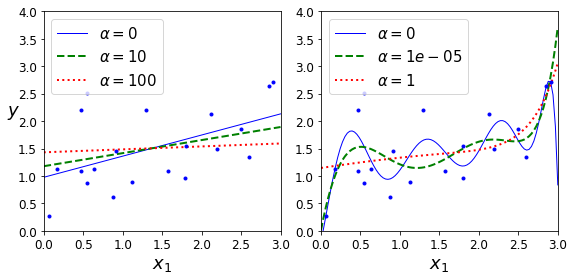

In [17]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(
            alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(
                    degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw,
                 label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

능형회귀는 한 가지 분명한 단점을 지니고 있다.

모든 계수를 0을 향해 수축하지만 정확하게 0이 아니기에 최종 모델에 p개 설명변수 모두를 포함한다는 것이다.

이는 모델 해석을 어렵게 만들고 특정 변수들을 제외한 결과를 제공하지 않는다.

이에 계수값이 0이 될 수 있도록 능형회귀식의 수축 파라메터값을 다른 값으로 변경하여 위 한계를 극복하고자 하였다.

이 기법이 바로 **Lasso** 이다.


### 라쏘 회귀


Lasso는 능형회귀(릿지 회귀) 기법에서 계수 추정치가 0이 되지 않는 한계를 극복하고자 수축 파라메터를 수정한 기법이다.

Lasso 계수들 $\hat{\beta}^L_{\lambda}$ 은 다음 식의 값을 최소로 만든다.

$$RSS + \lambda\sum^P_{j=1}|\beta_j|$$

RSS 계산에 MSE를 사용함으로 아래와 같이 표현할 수도 있다.

$$\text{MSE}(\theta) + \lambda\sum^p_{j=1}|\theta_j|$$

Lasso는 능형회귀 페널티에서 $\beta^2_j$ 항을 $|\beta_j|$로 대체한 것으로 $\lambda$가 충분히 클 경우 계수 추정치들의 일부를 정확히 0이 되게 하여 최상의 부분집합 선택처럼 **변수 선택**을 할 수 있게 한다.

즉 Lasso는 스파스 모델(변수들의 일부만 포함하는 모델)을 제공함으로써 모델 해석을 더 용의하게 만들었다.

코드를 통해 확인해보자.


In [18]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

/Users/jaewone/ENTER/envs/tf25/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


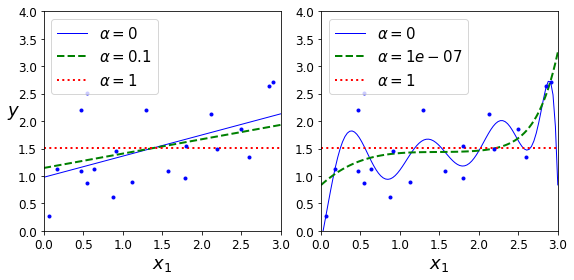

In [19]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

### 엘라스틱넷 회귀


엘라스틱넷 회귀란 릿지 회귀와 라쏘 회귀를 절충한 모델로 규제항은 릿지와 회귀의 교제항을 단순히 더해서 사용한다.

엘라스틱넷의 비용함수는 아래와 같이 정의된다.

$$\text{RSS} + r\alpha\displaystyle\sum^n_{i=1}|\beta_i| + \cfrac{1-r}{2}\alpha\displaystyle\sum^n_{i=1}\beta^2_i$$

MSE를 RSS 평가지표로 사용함으로 아래와 같이 표현할 수 있다.

$$\text{MSE}(\theta) + r\alpha\displaystyle\sum^n_{i=1}|\theta_i| + \cfrac{1-r}{2}\alpha\displaystyle\sum^n_{i=1}\theta^2_i$$

코드로 보자.


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

### 조기 종료


#### 개요

최상위 부분 집합 선택 기법과 릿지 회귀, 라쏘 회귀와 같은 수축 기법을 통해 모델의 과적합을 방지하고자 하였다.

조기 종료 또한 과적합을 방지하는 기법으로 많이 사용된다.

#### 조기 종료란

조기종료란 검증 에러가 최소값에 도달하면 훈련을 중지하는 것이다. 즉 손실값이 다시 증가하는 시점에서 반복훈련을 종료하는 것이다.

코드로 보자.


그림 저장: early_stopping_plot


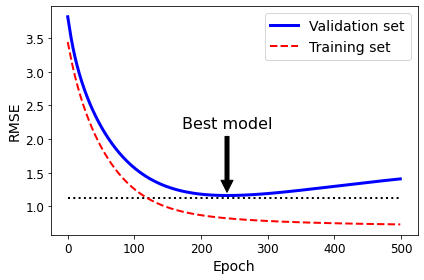

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [21]:
from copy import deepcopy
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10)


poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
             )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

best_epoch, best_model

## 로지스틱 회귀


선형 회귀와 같이 독립변수의 선형 결합된 값을 로지스틱 함수에 입력하여 0과 1 사이의 값을 출력하는 회귀 모델이다.

0과 1 사이의 값을 출력하기에 분류 문제에서 확률 값을 도출할 때 자주 사용된다.

아래는 로지스틱 회귀 함수이다. $-\infty$에서 $\infty$까지의 값을 입력받아 0과 1 사이의 값을 출력함을 확인할 수 있다.

> 로지스틱 회귀 함수는 시그모이드 함수의 일종임으로 시그모이드 함수라고 부르기도 한다.


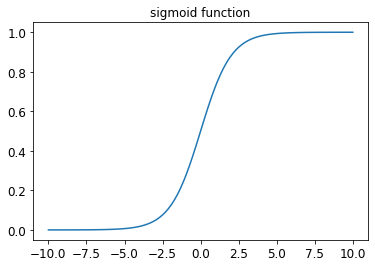

In [22]:
def show_sigmoid_function():
    x = np.linspace(-10, 10, 100)
    y = 1 / (1 + np.exp(-x))
    plt.plot(x, y)
    plt.title("sigmoid function")
    plt.show()


show_sigmoid_function()

추가적으로 로지스틱 회귀 함수를 사용하였을 때 비용 함수로 로그 손실 함수를 주로 사용하며 아래와 같이 정의할 수 있다.

$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$


로지스틱 회귀를 이용하여 붓꽃 분류 문제를 풀어보자.

먼저 데이터를 불러오자.


In [23]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(int)  # Iris virginica이면 1 아니면 0

X.shape, y.shape

((150, 1), (150,))

sklearn의 LogisticRegression을 통해 로지스틱 회귀를 수행할 수 있다.


그림 저장: logistic_regression_plot


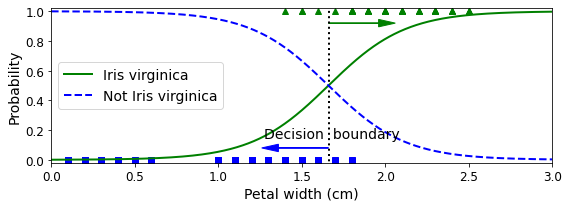

1.66cm


In [24]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression 인스턴스 생성
log_reg = LogisticRegression(solver="lbfgs", random_state=42)

# 모델 학습
log_reg.fit(X, y)

# 꽃잎 너비가 0 ~ 3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# predict_proba() 메서드를 이용해 확률 계산
y_proba = log_reg.predict_proba(X_new)

# 그래프 그리기
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.figure(figsize=(8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary",
         fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0,
          head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0,
          head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

print(f'{decision_boundary[0]:.2f}cm')  # 1.6cm 근방에서 결정 경계가 생성된다.

In [25]:
# 예측 수행
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax 회귀


로지스틱 회귀는 0과 1 사이의 값으로 출력을 하기에 이진 분류 문제에 주로 사용된다. 하지만 분류 문제가 3개 이상의 클래스를 분류하는 다중 클래스 분류 문제일 경우 로지스틱 회귀를 여러 번 수행하여 분류를 수행해야 한다. 이러한 문제를 해결하기 위해 소프트맥스 회귀가 제안되었다.

Softmax 함수는 아래와 같이 정의된다.

$$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$$

Softmax 함수의 수식을 통해 유추할 수 있듯 전체 클래스에 대한 각각의 비율을 반환한다. 따라서 반환되는 전체 값의 합은 1이며 이에 따라 다중 분류 문제에 주로 사용된다.

추가적으로 소프트맥스 함수를 사용하였을 때 주로 같이 사용되는 비용함수는 corss entropy 이며 아래와 같이 정의된다.

$$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$$

코드로 보자.


그림 저장: softmax_regression_contour_plot


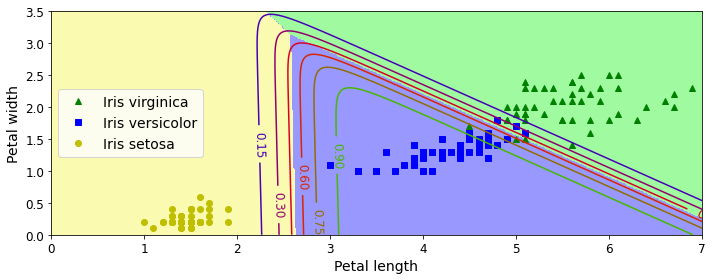

In [26]:
from matplotlib.colors import ListedColormap

# 그래프를 그리기 위한 x0, x1 생성
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# 데이터셋 생성
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

# LogisticRegression 인스턴스 생성
softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# 모델 학습
softmax_reg.fit(X, y)

# 예측을 수행
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)


# 그래프로 표시
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [27]:
print(softmax_reg.predict([[5, 2]])[0])  # 예측을 수행한다.

print(softmax_reg.predict_proba([[5, 2]]))  # 각 클래스에 대한 확률을 출력한다.

2
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# X_train에 대한 예측값을 구한다.
y_train_pred = cross_val_predict(LinearRegression(), X_train, y_train, cv=3)

# 오차 행렬을 구한다.
cm = confusion_matrix(y_train, y_train_pred)

# 정밀도로 cm[1, 1] / (cm[0, 1] + cm[1, 1])을 통해 직접 구할 수도 있다.
precision_score(y_train, y_train_pred)

# 재현율로 cm[1, 1] / (cm[1, 0] + cm[1, 1])을 통해 직접 구할 수도 있다.
recall_score(y_train, y_train_pred)

# F1 점수로 cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)을 통해 직접 구할 수도 있다.
f1_score(y_train, y_train_pred)

(80, 1) (80, 1) (20, 1) (20, 1)
[1.74154027] [9.03883242] [1.09898704] [7.59661151]


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.